### COMP SCI 524

### Homework 7

### Jingde Wan

### Q1

#### (a)

In [12]:
# Q1

using CSV, DataFrames, LinearAlgebra

raw = CSV.read("uy_data.csv", header=0, DataFrame);

u = raw[:, 1];
y = raw[:, 2];
T = length(u)

100

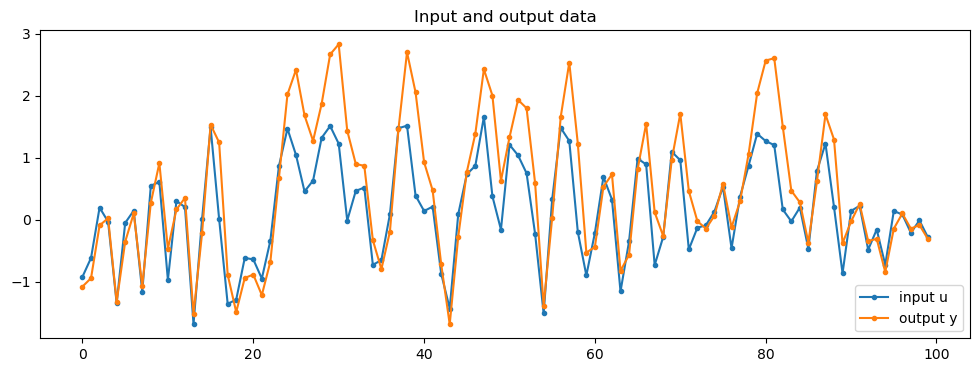

In [13]:
# plot the u and y data
using PyPlot
PyPlot.svg(true);

figure(figsize=(12,4));
plot([u y], ".-");
legend(["input u", "output y"], loc="lower right");
title("Input and output data");

MA model:

In [17]:
# generate A matrix. Using more width creates better fit.  (MA model)
width = 5
A = zeros(T,width)
for i = 1:width
    A[i:end,i] = u[1:end-i+1]
end
wopt_ma = A\y
yest_ma = A*wopt_ma;

The norm of the error using MA is: 2.460854388269911


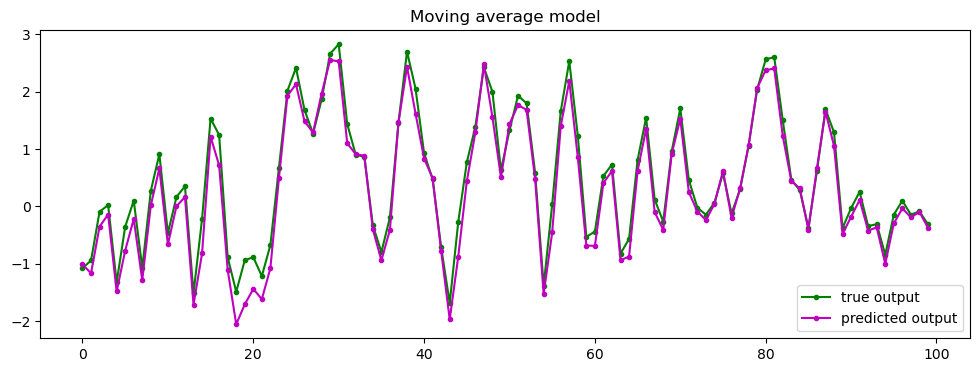

In [18]:
# plot the other two similarly

# yest_ma = zeros(size(y))

println("The norm of the error using MA is: ", norm(yest_ma - y));
flush(stdout);

figure(figsize=(12,4));
plot(y, "g.-", yest_ma, "m.-");
legend(["true output", "predicted output"], loc="lower right");
title("Moving average model");

AR model:

In [19]:
width = 5
B = zeros(length(y),width)
for i = 1:width
    B[i+1:end,i] = y[1:end-i]
end
wopt_ar = B\y
yest_ar = B*wopt_ar;

The norm of the error using AR is: 7.436691765656793


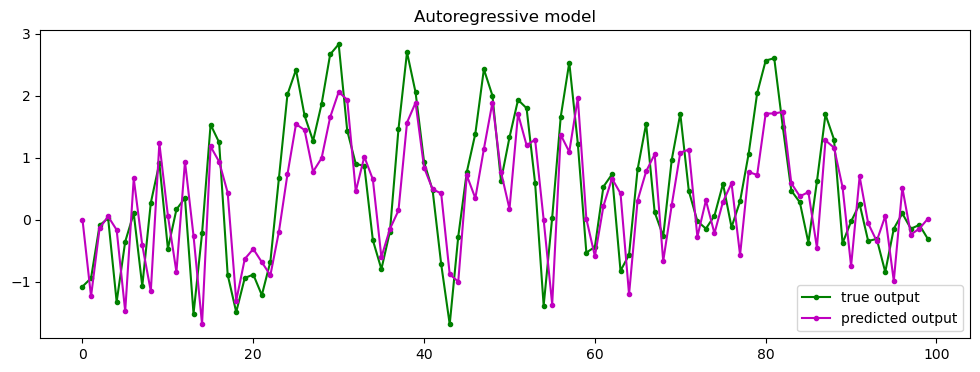

In [20]:
# plot the other two similarly

# yest_ma = zeros(size(y))

println("The norm of the error using AR is: ", norm(yest_ar - y));
flush(stdout);

figure(figsize=(12,4));
plot(y, "g.-", yest_ar, "m.-");
legend(["true output", "predicted output"], loc="lower right");
title("Autoregressive model");

#### (b)

In [21]:
k = 1
l = 1
C = zeros(length(y),k+l)
for i = 1:k
    C[i+1:end,i] = y[1:end-i]
end

for i = 1:l
    C[i:end,k+i] = u[1:end-i+1]
end
wopt_arma = C\y
yest_arma = C*wopt_arma;

The norm of the error using ARMA is: 1.8565828148734604


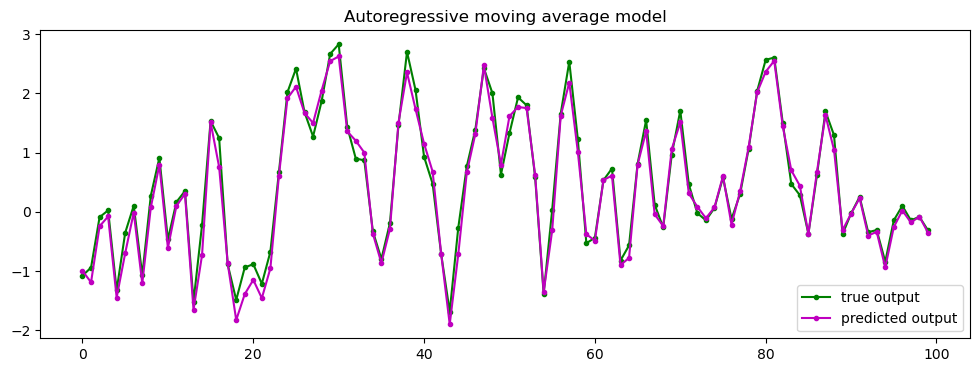

In [22]:
# plot the other two similarly

# yest_ma = zeros(size(y))

println("The norm of the error using ARMA is: ", norm(yest_arma - y));
flush(stdout);

figure(figsize=(12,4));
plot(y, "g.-", yest_arma, "m.-");
legend(["true output", "predicted output"], loc="lower right");
title("Autoregressive moving average model");

### Q2

In [73]:
# Q2

y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02];
x = 1:15;

In [74]:
# Do not exclude the outliers
using JuMP, Ipopt

m = Model(Ipopt.Optimizer)

@variable(m, a1)
@variable(m, b1)

@objective(m, Min, sum((y[i]-a1*x[i]-b1)^2 for i=1:15))

optimize!(m)

a1 = getvalue(a1)
b1 = getvalue(b1)

println("optimal a is ", a1)
println("optimal b is ", b1)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [75]:
# Exclude the outliers
using JuMP, Ipopt

y_new = [6.31, 3.78, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 1.58, 2.17, 0.02];
x_new = [1,2,4,5,6,7,8,9,10,11,13,14,15];

m1 = Model(Ipopt.Optimizer)

@variable(m1, a2)
@variable(m1, b2)

@objective(m1, Min, sum((y_new[i]-a2*x_new[i]-b2)^2 for i=1:13))

optimize!(m1)

a2 = getvalue(a2)
b2 = getvalue(b2)

println("optimal a for excluding outliers is ", a2)
println("optimal b for excluding outliers is ", b2)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

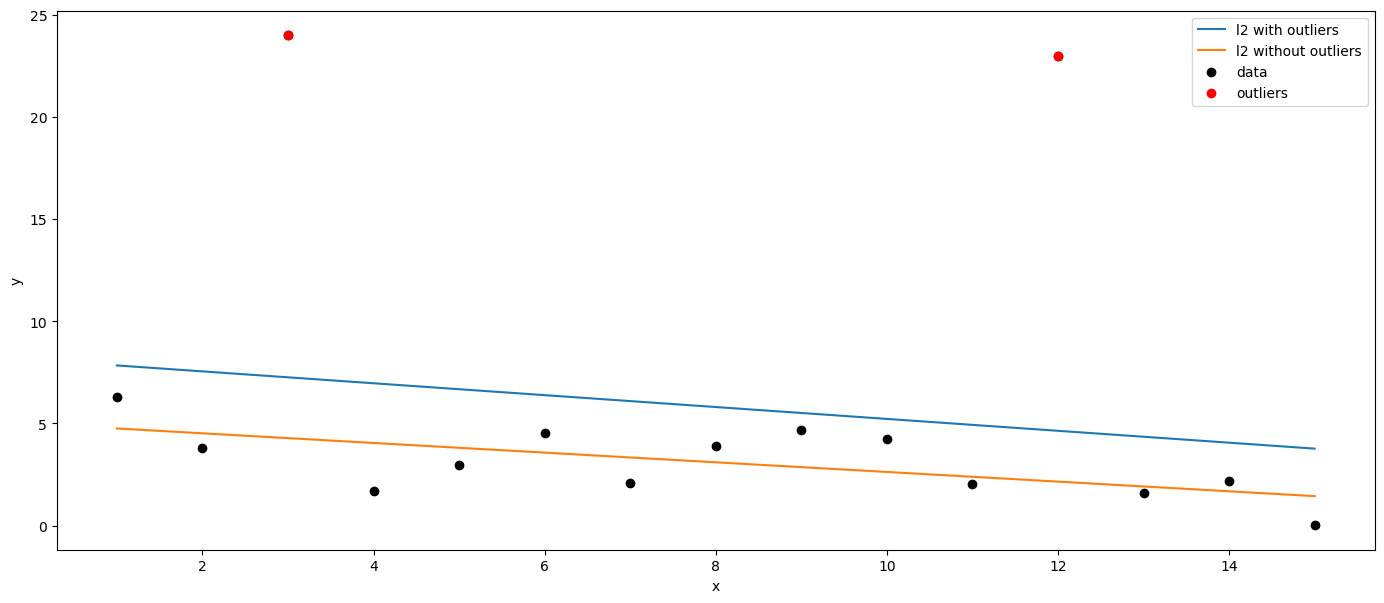

In [76]:
# Make all the plots

# a1, a2, a3, a4, a5, a6, b1, b2, b3, b4, b5, b6 = [0 for _ = 1:12];

using PyPlot
figure(figsize = (17,7));
scatter(x,y,label="data",color = "black");
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red"); # outliers

plot(x, a1*x .+ b1,label="l2 with outliers");
plot(x, a2*x .+ b2,label="l2 without outliers");

legend(loc ="best");
ylabel("y");
xlabel("x");


#### (b)

$l_{1}$ cost handles outliers better than Least-square because the $l_{1}$ linear fit with outliers is closer to the linear fit without outliers relative to $l_{2}$ cost.

In [77]:
# L-1 cost function
# Do not exclude the outliers
using JuMP, Clp

m2 = Model(Clp.Optimizer)

@variable(m2, a3)
@variable(m2, b3)
@variable(m2, t[1:15])

for i in 1:15
    @constraint(m2, y[i]-a3*x[i]-b3 <= t[i])
    @constraint(m2, y[i]-a3*x[i]-b3 >= -t[i])    
end

@objective(m2, Min, sum(t))

optimize!(m2)

a3 = getvalue(a3)
b3 = getvalue(b3)

println("optimal a is ", a3)
println("optimal b is ", b3)

optimal a is -0.3559999999999998
optimal b is 6.6659999999999995
Coin0506I Presolve 30 (0) rows, 17 (0) columns and 90 (0) elements
Clp0006I 0  Obj 0 Primal inf 40.234704 (15) Dual inf 0.40469047 (15) w.o. free dual inf (0)
Clp0006I 24  Obj 54.03
Clp0000I Optimal - objective value 54.03
Clp0032I Optimal objective 54.03 - 24 iterations time 0.002


In [78]:
# L-1 cost function
# Exclude the outliers
using JuMP, Clp

y_new = [6.31, 3.78, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 1.58, 2.17, 0.02];
x_new = [1,2,4,5,6,7,8,9,10,11,13,14,15];

m3 = Model(Clp.Optimizer)

@variable(m3, a4)
@variable(m3, b4)
@variable(m3, t[1:13])

for i in 1:13
    @constraint(m3, y_new[i]-a4*x_new[i]-b4 <= t[i])
    @constraint(m3, y_new[i]-a4*x_new[i]-b4 >= -t[i])    
end

@objective(m3, Min, sum(t))

optimize!(m3)

a4 = getvalue(a4)
b4 = getvalue(b4)

println("optimal a is ", a4)
println("optimal b is ", b4)

optimal a is -0.1911111111111111
optimal b is 4.162222222222222
Coin0506I Presolve 26 (0) rows, 15 (0) columns and 78 (0) elements
Clp0006I 0  Obj 0 Primal inf 19.73877 (13) Dual inf 0.35272914 (13) w.o. free dual inf (0)
Clp0006I 18  Obj 14.002222
Clp0000I Optimal - objective value 14.002222
Clp0032I Optimal objective 14.00222222 - 18 iterations time 0.002


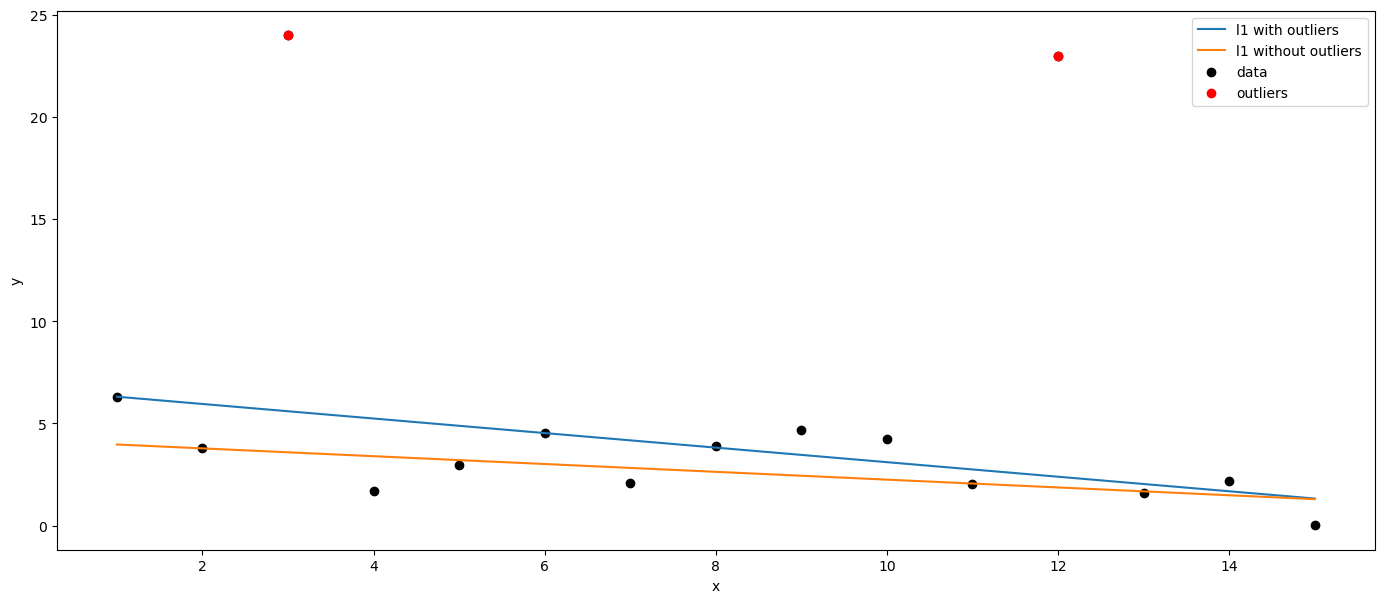

In [79]:
# Make all the plots

# a1, a2, a3, a4, a5, a6, b1, b2, b3, b4, b5, b6 = [0 for _ = 1:12];

using PyPlot
figure(figsize = (17,7));
scatter(x,y,label="data",color = "black");
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red"); # outliers

plot(x, a3*x .+ b3,label="l1 with outliers");
plot(x, a4*x .+ b4,label="l1 without outliers");

legend(loc ="best");
ylabel("y");
xlabel("x");


#### (c)

In [80]:
using Ipopt, LinearAlgebra

M = 1
function HuberLoss(x)
    m4 = Model(Ipopt.Optimizer)
    
    @variable(m4, v >= 0)
    @variable(m4, w <= M)
    
    @constraint(m4, x <= w + v)
    @constraint(m4, x >= -w - v)
    
    @objective(m4, Min, w^2 + 2*M*v)
    
    optimize!(m4)
    return objective_value(m4)
end

HuberLoss (generic function with 1 method)

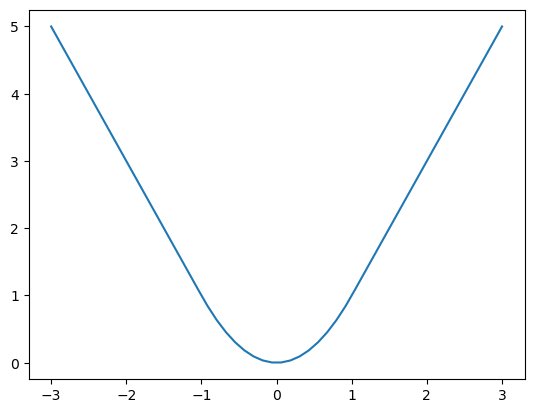

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        2
                     variables with only lower bounds:        1
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        1
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc04ac8a220>

In [81]:
x_collect = range(-3, stop=3, length = 50)
y_collect = []

for x in x_collect
    push!(y_collect, HuberLoss(x))
end

plot(x_collect, y_collect)

In [82]:
# Do not exclude outliers
using JuMP, Ipopt

M = 1

m5 = Model(Ipopt.Optimizer)

@variable(m5, a5)
@variable(m5, b5)
@variable(m5, v[1:15] >= 0)
@variable(m5, w[1:15] <= M)

for i in 1:15
    @constraint(m5, y[i]-a5*x[i]-b5 <= w[i]+v[i])
    @constraint(m5, y[i]-a5*x[i]-b5 >= -w[i]-v[i])
end

@objective(m5, Min, sum(w[i]^2 + 2*M*v[i] for i in 1:15))

optimize!(m5)

a5 = getvalue(a5)
b5 = getvalue(b5)

println("optimal a is ", a5)
println("optimal b is ", b5)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      120
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:       32
                     variables with only lower bounds:       15
                variables with lower and upper bounds:        0
                     variables with only upper bounds:       15
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       30
        inequality constraints with only lower bounds:       15
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       15

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [83]:
# Exclude outliers
using JuMP, Ipopt

M = 1
y_new = [6.31, 3.78, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 1.58, 2.17, 0.02];
x_new = [1,2,4,5,6,7,8,9,10,11,13,14,15];

m6 = Model(Ipopt.Optimizer)

@variable(m6, a6)
@variable(m6, b6)
@variable(m6, v[1:13] >= 0)
@variable(m6, w[1:13] <= M)

for i in 1:13
    @constraint(m6, y_new[i]-a6*x_new[i]-b6 <= w[i]+v[i])
    @constraint(m6, y_new[i]-a6*x_new[i]-b6 >= -w[i]-v[i])
end

@objective(m6, Min, sum(w[i]^2 + 2*M*v[i] for i in 1:13))

optimize!(m6)

a6 = getvalue(a6)
b6 = getvalue(b6)

println("optimal a is ", a6)
println("optimal b is ", b6)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      104
Number of nonzeros in Lagrangian Hessian.............:       13

Total number of variables............................:       28
                     variables with only lower bounds:       13
                variables with lower and upper bounds:        0
                     variables with only upper bounds:       13
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       26
        inequality constraints with only lower bounds:       13
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       13

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

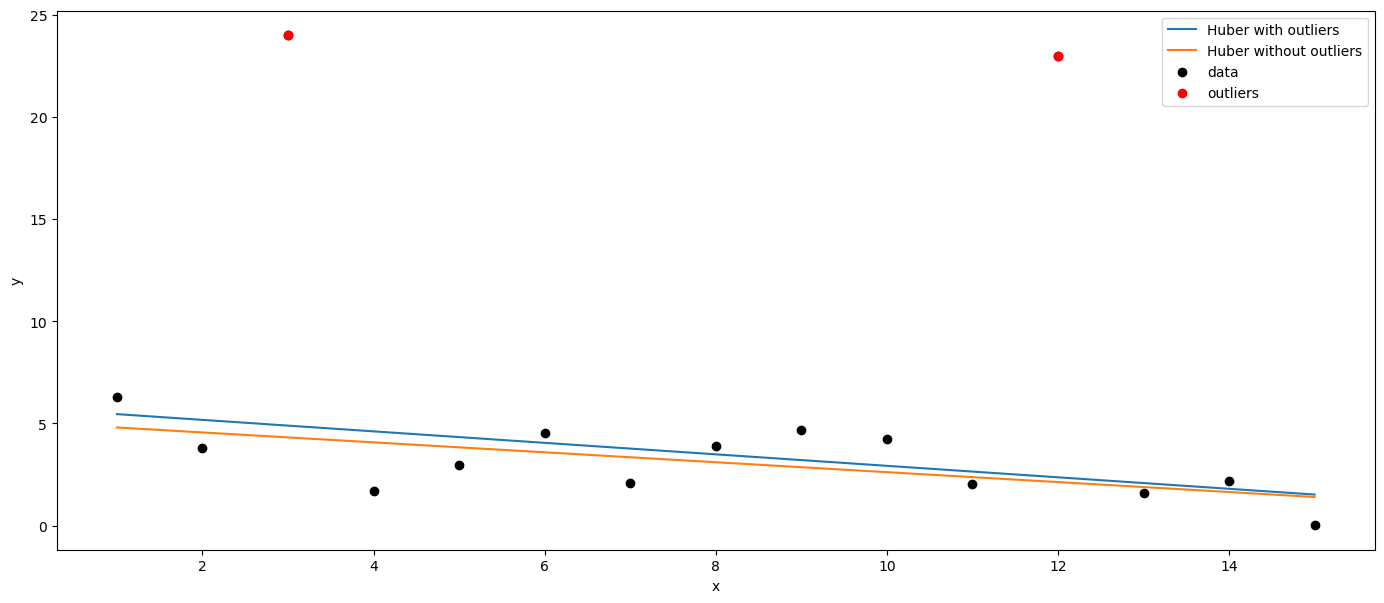

In [84]:
using PyPlot
figure(figsize = (17,7));
scatter(x,y,label="data",color = "black");
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red"); # outliers

plot(x, a5*x .+ b5,label="Huber with outliers");
plot(x, a6*x .+ b6,label="Huber without outliers");

legend(loc ="best");
ylabel("y");
xlabel("x");

### Q3

#### (a)

See the hand writing attached below.

#### (b)

In [3]:
using JuMP, Ipopt

m = Model(Ipopt.Optimizer)

@variable(m, x)
@variable(m, y)
@variable(m, z)

@constraint(m, log(10)+z-y <= 0)
@NLconstraint(m, log(exp(-log(500) + x + y -z) + exp(-log(500) + y) + exp(-log(500) + y + z)) <= 0)

@objective(m, Min, -(x+2y))

optimize!(m)

x = getvalue(x)
y = getvalue(y)
z = getvalue(z)

T = exp(x)
r = exp(y)
w = exp(z)

println("optimal T is ", T)
println("optimal r is ", r)
println("optimal w is ", w)

println("optimal objective value is ", objective_value(m))

println("heat flow is ", T*r^2)
println("total cost is ", T*r/w+r+r*w)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  